# Метод прогонки


In [1]:
# b = under_main_diag
# c = main_diag
# d = above_main_diag
# r = result_vect

def sweep(b, c, d, r):
    b, c, d, r = map(lambda k_list: list(map(float, k_list)), (b, c, d, r))
    
    n = len(r)
    
    sigma = [0] * n
    delta = [0] * n
    lambd = [0] * n
    x = [0] * n
    for i in range(n):
        if i == 0:
            delta[i] = c[i]
        else:
            delta[i] = c[i] + b[i] * sigma[i-1]

        sigma[i] = - d[i] / delta[i]

        if i == 0:
            lambd[i] = r[i] / delta[i]
        else:
            lambd[i] = (r[i] - b[i] * lambd[i-1])/ delta[i]

    for i in range(n - 1, -1, -1):
        if i == n - 1:
            x[i] = lambd[i]
        else:
            x[i] = sigma[i] * x[i+1] + lambd[i]

            
    return x

In [2]:
n = 10
a = 1
b = 4
c = 1
f = 12
k1 = k2 = 0.25
m1 = m2 = 2.5

main_diag = [1] + [b] * (n-2) + [1]
under_main_diag = [0] + [c] * (n-2) + [k1]
above_main_diag = [k2] + (n-2) * [a] + [0]
result_vect = [m1] + [f] * (n-2) + [m2]

x = sweep(under_main_diag, main_diag, above_main_diag, result_vect)
print(x)

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.9999999999999996, 2.0]


In [3]:
main_diag = [2, 2, 10]
under_main_diag = [0, 1, 0]
above_main_diag = [1, 0, 0]
result_vect = [4, 13, 0] 

x = sweep(under_main_diag, main_diag, above_main_diag, result_vect)
print(x)

[-1.6666666666666665, 7.333333333333333, 0.0]


In [62]:
import matplotlib.pyplot as plt
import numpy as mp
import math
import random as rd

In [135]:
p = math.pi

#arr_x = [0, p / 6, p / 3, p / 2]
#arr_y = [1, 0.87, 0.5, 0]

shag = 0.4

arr_x = list(np.arange(-1, 1 + shag, shag))
arr_y = [rd.uniform(0.0, 1.0) for _ in arr_x]

m0 = [10]
mn = [10]

n = len(arr_x)

arr_h = [0] + [arr_x[i] - arr_x[i - 1] for i in range(1, n)]

equations_system = []
free_vect = []

for i in range(1,n-1):
    equations_system.append([arr_h[i] / 6, 
                            (arr_h[i] + arr_h[i+1]) / 3, 
                            arr_h[i+1] / 6])
    free_val = ((arr_y[i+1] - arr_y[i]) / arr_h[i+1] - (arr_y[i] - arr_y[i-1]) / arr_h[i])
    if i == 1:
        free_val -= m0[0] * arr_h[i] / 6
    if i == n-1:
        free_val -= mn[0] * arr_h[i+1] / 6
    free_vect.append(free_val)
    
arr_c = []
arr_b = [0]
arr_d = []

for vect in equations_system:
    arr_c.append(vect[1])
    arr_b.append(vect[0])
    arr_d.append(vect[2])
arr_d.append(0)
    
arr_b[0] = 0
arr_d[-1] = 0

flag = 0

if len(arr_c) == 2:
    flag = 1
    arr_c.append(1)
    arr_d[1] = 0
    arr_b[2] = 0
    free_vect.append(0)
    
arr_m = sweep(arr_b, arr_c, arr_d, free_vect)

if flag == 1:
    arr_m.pop()
    
arr_m = m0 + arr_m + mn

print("arr_m = ",arr_m)

arr_m =  [10, -11.947827690317139, 17.999267850885637, -16.967918686879727, 13.862267239919994, 10]


In [136]:
arr_delta_y = [arr_y[i+1]-arr_y[i] for i in range(n-1)]
arr_delta_m = [arr_m[i+1]-arr_m[i] for i in range(n-1)]
#print(arr_delta_y)
#print(arr_delta_m)
#print(arr_h)

arr_s = []
for i in range(n-1):
    arr_s.append([arr_y[i],
                  1 / arr_h[i+1] * arr_delta_y[i] - arr_h[i+1] / 2 * arr_m[i] - arr_h[i+1] / 6 * arr_delta_m[i],
                  arr_m[i] / 2,
                  1 / 6 / arr_h[i+1] * arr_delta_m[i]])
#print(arr_s)

In [137]:
def s_3(i, x):
    arr_kf = arr_s[i]
    res = 0
    for j in range(len(arr_kf)):
        res += arr_kf[j] * (x - arr_x[i]) ** j
    return res

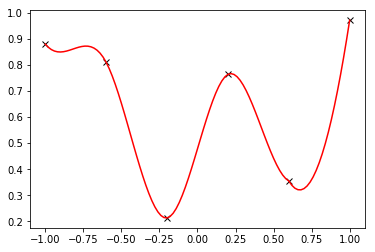

In [138]:
shag = (arr_x[-1] - arr_x[0]) / 100

arr_x_calc = np.arange(arr_x[0], arr_x[-1] + shag, shag)
arr_y_calc = []

for x in arr_x_calc:
    s_i = -1
    for x1 in arr_x:
        if x > x1 + shag:
            s_i += 1
        if s_i == -1:
            s_i = 0
    arr_y_calc.append(s_3(s_i, x))

plt.plot(arr_x, arr_y, 'x', c=[0, 0, 0])
plt.plot(arr_x_calc, arr_y_calc, c="r")

plt.show()
    